In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar 

# a & b & c

In [8]:
L = 25
g = 1
V = 5

# Creating the basis
basis_vec = np.diag(np.ones(L))
ket0 = np.matrix(basis_vec[:,0]).T 
bra0 = ket0.H

H = np.matrix(np.zeros((L,L)))

for i in range(L-1):
    ket_i = np.matrix(basis_vec[:,i]).T
    ket_i1 = np.matrix(basis_vec[:,i+1]).T
    bra_i = ket_i.H
    bra_i1 = ket_i1.H
    
    H += -g * (ket_i @ bra_i1 + ket_i1 @ bra_i)

H -= V * (ket0 @ bra0)


eigenvals, eigenvec = np.linalg.eigh(H)


print(f"Eigenvalues: {eigenvals.shape}")
print(f"Eigenvectors: {eigenvec.shape}")
# Checking if we did it right
print(f"Checking if the eigenvalue equation is correct: {(H @ eigenvec[:,0]).all() == (eigenvals[0] * eigenvec[:,0]).all()}")
print(f"Lowest energy: {eigenvals[0]}")


Eigenvalues: (25,)
Eigenvectors: (25, 25)
Checking if the eigenvalue equation is correct: True
Lowest energy: -5.200000000000001


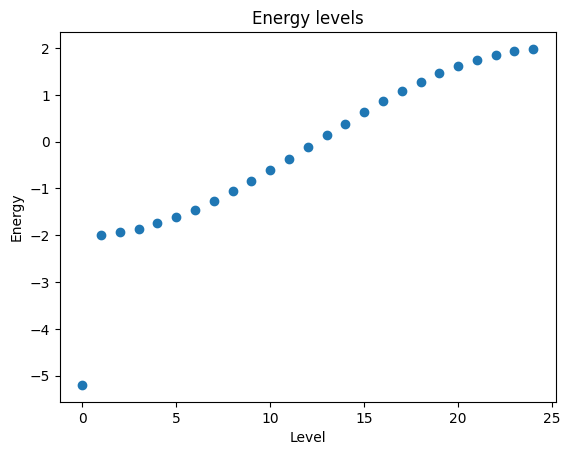

In [3]:
plt.scatter([i for i in range(L)], eigenvals)
plt.title("Energy levels")
plt.xlabel("Level")
plt.ylabel("Energy")
plt.savefig("energy_levels.pdf")
plt.show()

# d

In [4]:
print(f"Probability of finding particle at position 0 in energy groundstate 0{abs(eigenvec[0,0])**2}")
print(f"Probability of finding particle at position 1 in energy groundstate 0{abs(eigenvec[1,0])**2}")

Probability of finding particle at position 0 in energy groundstate 00.9599999999999982
Probability of finding particle at position 1 in energy groundstate 00.03839999999999999


# e

In [5]:
eigenstate = ket0 # The particle is at the 0 position

c_n = np.zeros(L)*0j
for i in range(L):
    c_n[i] = eigenvec[:,i].H @ eigenstate

print(c_n)

[ 0.9797959 +0.j -0.00897287+0.j -0.01766354+0.j  0.02581367+0.j
 -0.03320784+0.j  0.03968465+0.j  0.04513929+0.j -0.04951914+0.j
  0.05281518+0.j  0.05505167+0.j -0.05627624+0.j  0.05655143+0.j
 -0.05594813+0.j -0.05454091+0.j  0.05240488+0.j -0.04961373+0.j
 -0.04623872+0.j  0.04234819+0.j -0.03800751+0.j  0.03327922+0.j
  0.02822335+0.j  0.02289775+0.j -0.01735847+0.j  0.01166014+0.j
  0.00585635+0.j]


In [6]:
t = np.linspace(0, 10, 10001)
t *= hbar

P_pos0_t = np.zeros(len(t))*0j
for i in range(L):
    P_pos0_t += abs(c_n[i])**2 * np.exp(-1j*eigenvals[i]*t/hbar) 
    
print(abs(P_pos0_t)**2)

[1.         0.999999   0.999996   ... 0.92098668 0.92098416 0.92098164]


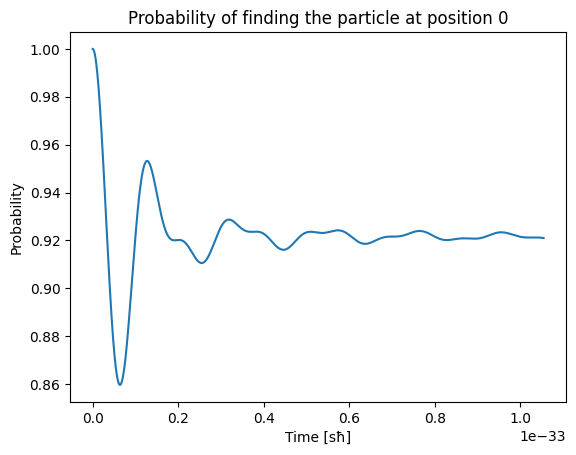

In [7]:
plt.plot(t, abs(P_pos0_t)**2)
plt.title("Probability of finding the particle at position 0")
plt.xlabel(r"Time [sħ]")
plt.ylabel(r"Probability")
plt.savefig("probability.pdf")
plt.show()